In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import re

In [3]:
def txt2df(txt):
    if txt == np.nan:
        return None
    splitted = txt.split("\n")
    cols = []
    data = {}
    newline = True
    for idx, t in enumerate(splitted):
        if t == "":
            newline = True
            continue
        aux = t.split()
        if newline:
            if aux[-1] == "\\":
                cols = cols + aux[:-1]
            else:
                cols = cols + aux
            newline = False
        else:
            if aux[0] not in data.keys():
                data[aux[0]] = aux[1:]
            else:
                data[aux[0]] = data[aux[0]] + aux[1:]
    df = {}
    for key in data.keys():
        df[data[key][0]] = data[key][1:]
    df = pd.DataFrame(data=df.values(), index=df.keys(), columns=cols[1:])
    display(df)
    return df

In [10]:
aux1 = pd.concat([pd.read_csv("python_RAG_False_corrected.csv"), pd.read_csv("python_RAG_False_2.csv")]).reset_index(drop=True)
aux2 = pd.read_csv("python_RAG_True.csv")
aux3 = pd.read_csv("sql_RAG_False.csv")
aux4 = pd.read_csv("sql_RAG_True.csv")
df = pd.concat([aux1, aux2, aux3, aux4], axis=0).reset_index(drop=True).fillna(pd.NA).drop("Unnamed: 0", axis=1)
df.to_csv("test1_request10.csv")

In [441]:
aux1 = pd.read_csv("test10_python_RAG_False.csv")
aux2 = pd.read_csv("test10_python_RAG_True.csv")
aux3 = pd.read_csv("test10_sql_RAG_False.csv")
aux4 = pd.read_csv("test10_sql_RAG_True.csv")
df = pd.concat([aux1, aux2, aux3, aux4], axis=0).reset_index(drop=True).fillna(pd.NA)
df.to_csv("test10_request1.csv")

In [15]:
aux1 = pd.read_csv("experiments/simple/python_RAG_False_simple.csv")
aux2 = pd.read_csv("experiments/simple/python_RAG_True_simple.csv")
aux3 = pd.read_csv("experiments/simple/sql_RAG_False_simple.csv")
aux4 = pd.read_csv("experiments/simple/sql_RAG_True_simple.csv")
df = pd.concat([aux1, aux2, aux3, aux4], axis=0).reset_index(drop=True).fillna(pd.NA)
df.to_csv("request_simple.csv")
df["resultsRows"]

0                                                   <NA>
1      ['ZTF17aaadxzc' 'ZTF17aaadxzc' 'ZTF17aaadxzc' ...
2                                                   <NA>
3                                                   <NA>
4                                                   <NA>
                             ...                        
123                                                 <NA>
124                                                 <NA>
125    ['ZTF18abqyaix' 'ZTF18abqyaix' 'ZTF18abqyaix' ...
126                                                 <NA>
127                                                 <NA>
Name: resultsRows, Length: 128, dtype: object

In [16]:
df

,exp,request,model,format,rag,genQuery,genQueryPython,goldQuery,results,resultsCols,resultsRows,error,usage,resultGold,resultGoldCols,resultGoldRows
0,11,Query all objects that were first classified a...,gpt-4o,python,False,\nSELECT *\nFROM object\nWHERE oid IN (\n S...,NaN,\r\nSELECT\r\n *\r\nFROM\r\n object\r\nI...,<NA>,<NA>,<NA>,"(psycopg2.errors.UndefinedColumn) column ""mjd""...","{'Schema Linking': {'input_tokens': 11437, 'ou...",oid ndethist ncovhist mjdstar...,['oid' 'ndethist' 'ncovhist' 'mjdstarthist' 'm...,[['ZTF23aaygkbn' 'ZTF23aaygkbn']\n ['ZTF23aayg...
1,12,"Return the oids, meanra, meandec, ndet, firstm...",gpt-4o,python,False,\n# Sub-query to get oids of objects classifie...,NaN,"\r\nSELECT\r\n object.oid, object.meanra, o...",oid meanra meandec nde...,['oid' 'meanra' 'meandec' 'ndet' 'firstmjd' 'd...,['ZTF17aaadxzc' 'ZTF17aaadxzc' 'ZTF17aaadxzc' ...,<NA>,"{'Schema Linking': {'input_tokens': 11476, 'ou...",oid meanra meandec nde...,['oid' 'meanra' 'meandec' 'ndet' 'firstmjd' 'd...,['ZTF18abcjwgb' 'ZTF18abcjwgb' 'ZTF18abcjwgb' ...
2,13,"""Query the top 200 objects classified SNIa acc...",gpt-4o,python,False,\nSELECT * \nFROM object \nWHERE oid IN (\n ...,NaN,\r\nSELECT\r\n *\r\nFROM\r\n probability\r...,<NA>,<NA>,<NA>,"(psycopg2.errors.UndefinedColumn) column ""prob...","{'Schema Linking': {'input_tokens': 11431, 'ou...",oid classifier_name classifi...,['oid' 'classifier_name' 'classifier_version' ...,['ZTF20acobvxk' 'ZTF22aalpfln' 'ZTF21abuyhau' ...
3,14,Given this list of oids ['ZTF17aaadpsi' 'ZTF19...,gpt-4o,python,False,\n# Step 2: Sub-query for OIDs\nsub_query_oids...,NaN,\r\nSELECT\r\n *\r\nFROM\r\n feature\r\n...,<NA>,<NA>,<NA>,(psycopg2.errors.SyntaxError) subquery has too...,"{'Schema Linking': {'input_tokens': 11519, 'ou...",oid name value ...,['oid' 'name' 'value' 'fid' 'version'],['ZTF19aaduodl' 'ZTF18abtriul' 'ZTF18abtriul' ...
4,15,Write a script in PostgreSQL that return objec...,gpt-4o,python,False,"\nSELECT \n o.oid, \n o.meanra, \n o....",NaN,"SELECT\r\n object.oid, object.meanra, objec...",<NA>,<NA>,<NA>,(psycopg2.errors.UndefinedTable) missing FROM-...,"{'Schema Linking': {'input_tokens': 11479, 'ou...",oid meanra meandec n...,['oid' 'meanra' 'meandec' 'ndet' 'firstmjd' 'c...,['ZTF21aanqsrs' 'ZTF21aanqjqc' 'ZTF21aanqpxc' ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,68,Get the following columns from the 'magstat' t...,gpt-4o,sql,True,"\nSELECT \n oid, \n fid, \n ndet, \n ...",NaN,"\r\nSELECT\r\n oid, fid, ndet, magmean\r\nF...",<NA>,<NA>,<NA>,"(psycopg2.errors.UndefinedColumn) column ""mean...","{'Schema Linking': {'input_tokens': 3941, 'out...",oid fid ndet magmean\n0 ZTF1...,['oid' 'fid' 'ndet' 'magmean'],['ZTF18acsvogv' 'ZTF18acsvogv']
124,69,For objects with ZTF identifiers 'ZTF20abywydb...,gpt-4o,sql,True,"\nSELECT \n o.oid AS ztf_identifier,\n o...",NaN,"SELECT\r\n oid, ndet, meanra, meandec,\r\n ...",<NA>,<NA>,<NA>,(psycopg2.errors.UndefinedColumn) column mg.va...,"{'Schema Linking': {'input_tokens': 3936, 'out...",oid ndet meanra meandec ...,['oid' 'ndet' 'meanra' 'meandec' 'firstmjd' 'l...,['ZTF20abywydb' 'ZTF20acduffd']
125,70,Get all features for the ZTF object 'ZTF18abqy...,gpt-4o,sql,True,\n-- Final query to retrieve all features for ...,NaN,"SELECT\r\n oid, name, value, fid, version\r...",oid name value f...,['oid' 'name' 'value' 'fid' 'version'],['ZTF18abqyaix' 'ZTF18abqyaix' 'ZTF18abqyaix' ...,<NA>,"{'Schema Linking': {'input_tokens': 3889, 'out...",oid name value ...,['oid' 'name' 'value' 'fid' 'version'],['ZTF18abqyaix' 'ZTF18abqyaix' 'ZTF18abqyaix' ...
126,71,Get at most 20 ZTF objects that satisfy the fo...,gpt-4o,sql,True,\nSELECT *\nFROM object\nWHERE oid IN (\n S...,NaN,SELECT\r\n *\r\nFROM\r\n object\r\nWHERE...,<NA>,<NA>,<NA>,"(psycopg2.errors.UndefinedColumn) column ""magp...","{'Schema Linking': {'input_tokens': 3924, 'out...",oid ndethist ncovhist mjdstart...,['oid' 'ndethist' 'ncovhist' 'mjdstarthist' 'm...,['ZTF18abjmkpw' 'ZTF17aaanr

In [9]:
print(df["genQuery"][127])


SELECT
    name,
    version,
    classes
FROM
    taxonomy
WHERE
    name = 'lc_classifier'



In [10]:
print(df["goldQuery"][127])

SELECT
    *
FROM
    taxonomy
WHERE
    classifier_name = 'lc_classifier'


In [19]:
df[df["error"].isna()]

,exp,request,model,format,rag,genQuery,genQueryPython,goldQuery,results,resultsCols,resultsRows,error,usage,resultGold,resultGoldCols,resultGoldRows
1,12,"Return the oids, meanra, meandec, ndet, firstm...",gpt-4o,python,False,\n# Sub-query to get oids of objects classifie...,NaN,"\r\nSELECT\r\n object.oid, object.meanra, o...",oid meanra meandec nde...,['oid' 'meanra' 'meandec' 'ndet' 'firstmjd' 'd...,['ZTF17aaadxzc' 'ZTF17aaadxzc' 'ZTF17aaadxzc' ...,<NA>,"{'Schema Linking': {'input_tokens': 11476, 'ou...",oid meanra meandec nde...,['oid' 'meanra' 'meandec' 'ndet' 'firstmjd' 'd...,['ZTF18abcjwgb' 'ZTF18abcjwgb' 'ZTF18abcjwgb' ...
5,16,Return a Sql query to get the predicted class ...,gpt-4o,python,False,"\nSELECT \n oid, \n class_name, \n pr...",NaN,"\r\nselect oid, class_name, probability from p...",oid class_name probability\...,['oid' 'class_name' 'probability'],['ZTF19ablzahy' 'ZTF18adjvyyu' 'ZTF18absuoro' ...,<NA>,"{'Schema Linking': {'input_tokens': 11437, 'ou...",oid class_name probabi...,['oid' 'class_name' 'probability'],['ZTF19ablzahy' 'ZTF18adjvyyu' 'ZTF18absuoro' ...
6,17,Which objects were found between June 1st and ...,gpt-4o,python,False,\nSELECT oid\nFROM object\nWHERE firstmjd BETW...,NaN,\r\nSELECT\r\n *\r\nFROM\r\n object INNE...,oid\n0 ZTF18absjuld\n1 ...,['oid'],['ZTF18absjuld' 'ZTF18abnpplz' 'ZTF18absideh' ...,<NA>,"{'Schema Linking': {'input_tokens': 11422, 'ou...",oid ndethist ncovhist mjdst...,['oid' 'ndethist' 'ncovhist' 'mjdstarthist' 'm...,[['ZTF18aagrcvk' 'ZTF18aagrcvk']\n ['ZTF18aabk...
7,18,Find all ZTF objects that lie within 30 arcsec...,gpt-4o,python,False,"\nWITH catalog (identifier, ra, dec, search_ra...",NaN,"WITH catalog (id, obj_ra, obj_dec, r_deg) AS (...",identifier input_ra input_dec search_radi...,['identifier' 'input_ra' 'input_dec' 'search_r...,['id_1' 'id_1' 'id_1' 'id_2' 'id_2'],<NA>,"{'Schema Linking': {'input_tokens': 11543, 'ou...",id obj_ra obj_dec r_deg ...,['id' 'obj_ra' 'obj_dec' 'r_deg' 'oid' 'ndet' ...,['ZTF18acfqezx' 'ZTF22acabgbb' 'ZTF20abyptpc' ...
8,19,Get at most 100 rows from the 'ss_ztf' table t...,gpt-4o,python,False,\nSELECT * \nFROM ss_ztf \nWHERE ssnamenr IS N...,NaN,SELECT\r\n *\r\nFROM\r\n ss_ztf\r\nWHERE...,oid candid ssdistn...,['oid' 'candid' 'ssdistnr' 'ssmagnr' 'ssnamenr'],['ZTF22aaavvzj' 'ZTF22aaavund' 'ZTF18acvupsi' ...,<NA>,"{'Schema Linking': {'input_tokens': 11424, 'ou...",oid candid ssdistn...,['oid' 'candid' 'ssdistnr' 'ssmagnr' 'ssnamenr'],['ZTF22aaavvzj' 'ZTF22aaavund' 'ZTF18adbnedl' ...
22,33,For objects with ZTF identifiers 'ZTF18acxlskz...,gpt-4o,python,False,\n# Sub-query to retrieve the 'oid' for the sp...,NaN,SELECT\r\n *\r\nFROM\r\n gaia_ztf\r\nWHE...,oid candid neargaia...,['oid' 'candid' 'neargaia' 'neargaiabright' 'm...,['ZTF18acxlskz'],<NA>,"{'Schema Linking': {'input_tokens': 11464, 'ou...",oid candid neargaia...,['oid' 'candid' 'neargaia' 'neargaiabright' 'm...,['ZTF18acxlskz']
23,34,Get all the information available in the 'obje...,gpt-4o,python,False,\nSELECT *\nFROM object\nWHERE oid = 'ZTF20aat...,NaN,SELECT\r\n *\r\nFROM\r\n object\r\nWHERE...,oid ndethist ncovhist mjdstarth...,['oid' 'ndethist' 'ncovhist' 'mjdstarthist' 'm...,['ZTF20aatxryt'],<NA>,"{'Schema Linking': {'input_tokens': 11422, 'ou...",oid ndethist ncovhist mjdstarth...,['oid' 'ndethist' 'ncovhist' 'mjdstarthist' 'm...,['ZTF20aatxryt']
34,33,"""Query the top 200 objects classified SNIa acc...",gpt-4o,python,True,"\nSELECT oid, probability\nFROM probability\nW...",NaN,\r\nSELECT\r\n *\r\nFROM\r\n probability\r...,oid probability\n0 ZTF20acob...,['oid' 'probability'],['ZTF20acobvxk' 'ZTF22aalpfln' 'ZTF21abuyhau' ...,<NA>,"{'Schema Linking': {'input_tokens': 3860, 'out...",oid classifier_name classifi...,['oid' 'classifier_name' 'classifier_version' ...,['ZTF20acobvxk' 'ZTF22aalpfln' 'ZTF21abuyhau' ...
35,34,Given this list of oids ['ZTF17aaadpsi' 'ZTF19...,gpt-4o,python,True,\n# Sub-query to filter the 'object' table usi...,NaN,\r\nSELECT\r\n *\r\nFROM\r\n feature\r

In [14]:
#sample = "test10_request1"
sample = "request_simple"
#sample = "test1_request10"
df = pd.read_csv(f"{sample}.csv")

In [20]:
def dorecall(pred, true):
    if pd.isna(pred):
        return 0
    try:
        sp = set(eval(pred))
        st = set(eval(true))
    except:
        sp = set(pred)
        st = set(true)        
    return len(sp.intersection(st)) / len(st)
    
def doprecision(pred, true):
    if pd.isna(pred):
        return 0
    try:
        sp = set(eval(pred))
        st = set(eval(true))
    except:
        sp = set(pred)
        st = set(true)
    if len(sp) == 0:
        return 0
    else:
        return len(sp.intersection(st)) / len(sp)

df["recallCols"] = df[df["error"].isna()].apply(lambda row: dorecall(row.resultsCols, row.resultGoldCols), axis=1)
df["recallRows"] = df[df["error"].isna()].apply(lambda row: dorecall(row.resultsRows, row.resultGoldRows), axis=1)
df["precisionCols"] = df[df["error"].isna()].apply(lambda row: doprecision(row.resultsCols, row.resultGoldCols), axis=1)
df["precisionRows"] = df[df["error"].isna()].apply(lambda row: doprecision(row.resultsRows, row.resultGoldRows), axis=1)

In [21]:
df["PerfectCols"] = (df[["recallCols", "precisionCols"]] == 1).sum(axis=1) / 2
df["PerfectRows"] = (df[["recallRows", "precisionRows"]] == 1).sum(axis=1) / 2

In [23]:
df[df["error"].isna()]

,exp,request,model,format,rag,genQuery,genQueryPython,goldQuery,results,resultsCols,...,usage,resultGold,resultGoldCols,resultGoldRows,recallCols,recallRows,precisionCols,precisionRows,PerfectCols,PerfectRows
1,12,"Return the oids, meanra, meandec, ndet, firstm...",gpt-4o,python,False,\n# Sub-query to get oids of objects classifie...,NaN,"\r\nSELECT\r\n object.oid, object.meanra, o...",oid meanra meandec nde...,['oid' 'meanra' 'meandec' 'ndet' 'firstmjd' 'd...,...,"{'Schema Linking': {'input_tokens': 11476, 'ou...",oid meanra meandec nde...,['oid' 'meanra' 'meandec' 'ndet' 'firstmjd' 'd...,['ZTF18abcjwgb' 'ZTF18abcjwgb' 'ZTF18abcjwgb' ...,1.0,0.684211,1.0,0.590909,1.0,0.0
5,16,Return a Sql query to get the predicted class ...,gpt-4o,python,False,"\nSELECT \n oid, \n class_name, \n pr...",NaN,"\r\nselect oid, class_name, probability from p...",oid class_name probability\...,['oid' 'class_name' 'probability'],...,"{'Schema Linking': {'input_tokens': 11437, 'ou...",oid class_name probabi...,['oid' 'class_name' 'probability'],['ZTF19ablzahy' 'ZTF18adjvyyu' 'ZTF18absuoro' ...,1.0,0.800000,1.0,0.875000,1.0,0.0
6,17,Which objects were found between June 1st and ...,gpt-4o,python,False,\nSELECT oid\nFROM object\nWHERE firstmjd BETW...,NaN,\r\nSELECT\r\n *\r\nFROM\r\n object INNE...,oid\n0 ZTF18absjuld\n1 ...,['oid'],...,"{'Schema Linking': {'input_tokens': 11422, 'ou...",oid ndethist ncovhist mjdst...,['oid' 'ndethist' 'ncovhist' 'mjdstarthist' 'm...,[['ZTF18aagrcvk' 'ZTF18aagrcvk']\n ['ZTF18aabk...,0.0,0.777778,0.0,0.777778,0.0,0.0
7,18,Find all ZTF objects that lie within 30 arcsec...,gpt-4o,python,False,"\nWITH catalog (identifier, ra, dec, search_ra...",NaN,"WITH catalog (id, obj_ra, obj_dec, r_deg) AS (...",identifier input_ra input_dec search_radi...,['identifier' 'input_ra' 'input_dec' 'search_r...,...,"{'Schema Linking': {'input_tokens': 11543, 'ou...",id obj_ra obj_dec r_deg ...,['id' 'obj_ra' 'obj_dec' 'r_deg' 'oid' 'ndet' ...,['ZTF18acfqezx' 'ZTF22acabgbb' 'ZTF20abyptpc' ...,0.0,0.000000,0.0,0.000000,0.0,0.0
8,19,Get at most 100 rows from the 'ss_ztf' table t...,gpt-4o,python,False,\nSELECT * \nFROM ss_ztf \nWHERE ssnamenr IS N...,NaN,SELECT\r\n *\r\nFROM\r\n ss_ztf\r\nWHERE...,oid candid ssdistn...,['oid' 'candid' 'ssdistnr' 'ssmagnr' 'ssnamenr'],...,"{'Schema Linking': {'input_tokens': 11424, 'ou...",oid candid ssdistn...,['oid' 'candid' 'ssdistnr' 'ssmagnr' 'ssnamenr'],['ZTF22aaavvzj' 'ZTF22aaavund' 'ZTF18adbnedl' ...,1.0,0.000000,1.0,0.000000,1.0,0.0
22,33,For objects with ZTF identifiers 'ZTF18acxlskz...,gpt-4o,python,False,\n# Sub-query to retrieve the 'oid' for the sp...,NaN,SELECT\r\n *\r\nFROM\r\n gaia_ztf\r\nWHE...,oid candid neargaia...,['oid' 'candid' 'neargaia' 'neargaiabright' 'm...,...,"{'Schema Linking': {'input_tokens': 11464, 'ou...",oid candid neargaia...,['oid' 'candid' 'neargaia' 'neargaiabright' 'm...,['ZTF18acxlskz'],1.0,1.000000,1.0,1.000000,1.0,1.0
23,34,Get all the information available in the 'obje...,gpt-4o,python,False,\nSELECT *\nFROM object\nWHERE oid = 'ZTF20aat...,NaN,SELECT\r\n *\r\nFROM\r\n object\r\nWHERE...,oid ndethist ncovhist mjdstarth...,['oid' 'ndethist' 'ncovhist' 'mjdstarthist' 'm...,...,"{'Schema Linking': {'input_tokens': 11422, 'ou...",oid ndethist ncovhist mjdstarth...,['oid' 'ndethist' 'ncovhist' 'mjdstarthist' 'm...,['ZTF20aatxryt'],1.0,1.000000,1.0,1.000000,1.0,1.0
34,33,"""Query the top 200 objects classified SNIa acc...",gpt-4o,python,True,"\nSELECT oid, probability\nFROM probability\nW...",NaN,\r\nSELECT\r\n *\r\nFROM\r\n probability\r...,oid probability\n0 ZTF20acob...,['oid' 'probability'],...,"{'Schema Linking': {'input_tokens': 3860, 'out...",oid classifier_name classifi...,['oid' 'classifier_name' 'classifier_version' ...,['ZTF20acobvxk' 'ZTF22aalpfln' 'ZTF21abuyhau' ...,0.0,0.000000,0.0,0.000000,0.0,0.0
35,34,Given this list of oids ['ZTF17aaadpsi' 'ZTF19...,gpt-4o,python,True,\n# Sub-query to filter the 'object' table usi...,NaN,\r\nSELECT\r\n *\r\nFROM\r\n featur

In [24]:
results = df.groupby(["format", "rag"]).apply(lambda df: (df[["recallCols", "recallRows", "precisionCols", "precisionRows"]] == 1).mean(), include_groups=False)
results

recallCols  recallRows  precisionCols  precisionRows
format rag                                                        
python False     0.15625     0.06250        0.15625        0.06250
       True      0.18750     0.09375        0.18750        0.09375
sql    False     0.25000     0.12500        0.25000        0.12500
       True      0.18750     0.12500        0.18750        0.12500

[Text(0, 0, 'Python, no RAG'),
 Text(0, 1, 'Python + RAG'),
 Text(0, 2, 'SQL, no RAG'),
 Text(0, 3, 'SQL + RAG')]

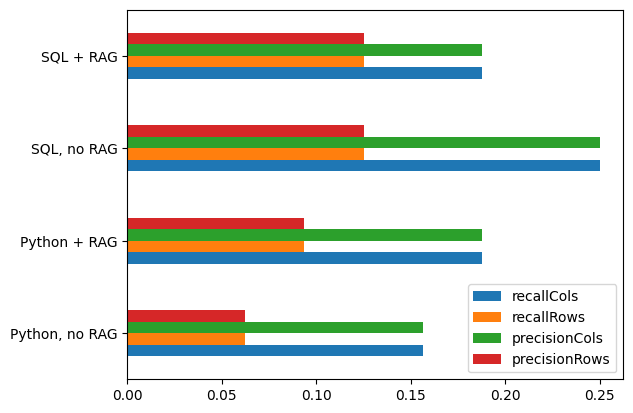

In [21]:
fig, ax = plt.subplots()
results.plot.barh(ax=ax)
ax.set_ylabel(None)
maplabels = {"(python, False)": "Python, no RAG", "(python, True)": "Python + RAG", "(sql, False)": "SQL, no RAG", "(sql, True)": "SQL + RAG"}
ax.set_yticklabels([maplabels[re.findall("'(.*?)'", str(lab))[0]] for lab in ax.get_yticklabels()])

Text(0.5, 0.98, 'simple\n')

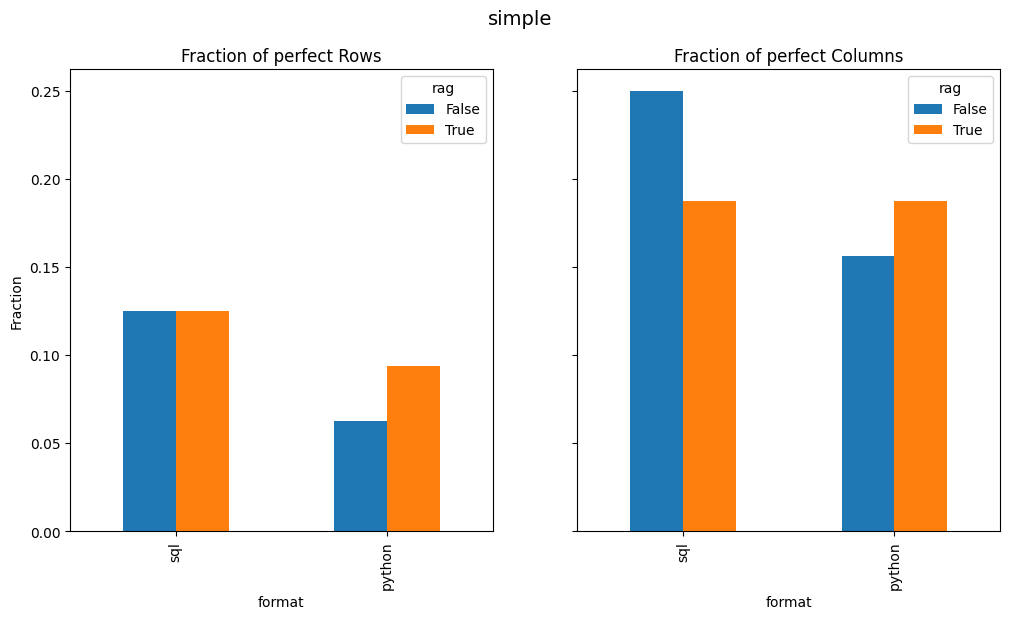

In [23]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 6), sharey=True)
titlestr = {"test10_request1": "10 queries, 1 sample per query", "test1_request10": "1 query, 10 samples per query", "request_simple": "simple"}
df.groupby(["format", "rag"]).apply(lambda df: (df[["PerfectCols", "PerfectRows"]] == 1).mean(), include_groups=False).rename({"PerfectCols": "Columns", "PerfectRows": "Rows"}, axis=1).reset_index().pivot(index='format', values='Rows', columns='rag').iloc[::-1].plot.bar(ax=ax[0])
df.groupby(["format", "rag"]).apply(lambda df: (df[["PerfectCols", "PerfectRows"]] == 1).mean(), include_groups=False).rename({"PerfectCols": "Columns", "PerfectRows": "Rows"}, axis=1).reset_index().pivot(index='format', values='Columns', columns='rag').iloc[::-1].plot.bar(ax=ax[1])
ax[0].set_title(f"Fraction of perfect Rows")
ax[1].set_title(f"Fraction of perfect Columns")
ax[0].set_ylabel("Fraction")
fig.suptitle(f'{titlestr[sample]}\n', fontsize=14)

In [449]:
df

,Unnamed: 0.1,exp,request,model,format,rag,genQuery,goldQuery,results,resultsCols,...,resultGold,resultGoldCols,resultGoldRows,Unnamed: 0,recallCols,recallRows,precisionCols,precisionRows,PerfectCols,PerfectRows
0,0,11,Return the objects classified as AGN that show...,gpt-4o,python,False,# Sub-query to get oids of objects classified ...,\r\nSELECT\r\n *\r\nFROM\r\n (\r\nSELECT *\r...,NaN,NaN,...,oid value name ...,['oid' 'value' 'name' 'version' 'fid'],['ZTF18aazyweo' 'ZTF18aazyweo' 'ZTF18abcobxs' ...,NaN,0.0,0.0,0.0,0.0,0.0,0.0
1,1,12,Get all the objects classified as AGN with a p...,gpt-4o,python,False,# Step 2: Sub-query to filter objects classifi...,"\r\nSELECT\r\n sq.oid, sq.value, sq.name, sq....",NaN,NaN,...,oid value name fea...,['oid' 'value' 'name' 'feature_fid' 'version' ...,['ZTF18aajadqs' 'ZTF18aajadqs' 'ZTF18aajadqs' ...,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,2,13,"Get the object identifiers, probabilities in ...",gpt-4o,python,False,# Sub-query to get oids with the highest proba...,"SELECT\r\n sq.oid, sq.probability, sq.diffm...",NaN,NaN,...,oid probability diffmaglim fid...,['oid' 'probability' 'diffmaglim' 'fid' 'mjd' ...,['ZTF18aaiaclp' 'ZTF18aaiaclp' 'ZTF18aaiaclp' ...,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,3,14,Find at most 200 ZTF objects that satisfy the ...,gpt-4o,python,False,# Sub-query to filter objects based on the pro...,SELECT\r\n *\r\nFROM\r\n object INNER JO...,NaN,NaN,...,oid ndethist ncovhist mjdstarth...,['oid' 'ndethist' 'ncovhist' 'mjdstarthist' 'm...,[['ZTF20acoknjv' 'ZTF20acoknjv' 'ZTF20acoknjv'...,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,4,15,Find at most 10 ZTF objects that have a first ...,gpt-4o,python,False,# Sub-query to get oids with first detection d...,SELECT\r\n *\r\nFROM\r\n forced_photomet...,NaN,NaN,...,pid oid mjd ...,['pid' 'oid' 'mjd' 'fid' 'ra' 'dec' 'e_ra' 'e_...,['ZTF24aaaajnz' 'ZTF24aaaajnz' 'ZTF24aaaajnz' ...,NaN,0.0,0.0,0.0,0.0,0.0,0.0
5,5,16,Find at most 50 ZTF objects that satisfy the f...,gpt-4o,python,False,# Sub-query to select object identifiers (oids...,SELECT\r\n *\r\nFROM\r\n magstat\r\nWHER...,NaN,NaN,...,oid fid stellar corrected nd...,['oid' 'fid' 'stellar' 'corrected' 'ndet' 'ndu...,['ZTF19acccyyt' 'ZTF19acccyyt' 'ZTF19aadblpm' ...,NaN,0.0,0.0,0.0,0.0,0.0,0.0
6,6,17,Find at most 30 ZTF objects that have a probab...,gpt-4o,python,False,# Sub-query to get the oids of objects with a ...,"SELECT\r\n sq1.oid,\r\n ss_ztf.candid, s...",NaN,NaN,...,oid candid ssdistn...,['oid' 'candid' 'ssdistnr' 'ssmagnr' 'ssnamenr...,['ZTF21abiqtce' 'ZTF21abiqtch' 'ZTF21abiqter' ...,NaN,0.0,0.0,0.0,0.0,0.0,0.0
7,7,18,Find at most 10 ZTF objects that satisfy the f...,gpt-4o,python,False,# Sub-query: Probability Filtering\nsub_query_...,"SELECT\r\n object.oid, ndet, firstmjd, last...",NaN,NaN,...,oid ndet firstmjd last...,['oid' 'ndet' 'firstmjd' 'lastmjd' 'probabilit...,['ZTF18aakqcul' 'ZTF18abbxrwg' 'ZTF18abctcjx' ...,NaN,0.0,0.0,0.0,0.0,0.0,0.0
8,8,19,"Find all detections, non-detections and forced...",gpt-4o,python,False,# Sub-query to get the object identifier for '...,"\r\nSELECT\r\n oid, mjd, fid, isdiffpos,\r\...",NaN,NaN,...,oid mjd fid isdiffpo...,['oid' 'mjd' 'fid' 'isdiffpos' 'magpsf' 'sigma...,['ZTF24aamtvxb' 'ZTF24aamtvxb' 'ZTF24aamtvxb' ...,NaN,0.0,0.0,0.0,0.0,0.0,0.0
9,9,20,Find at most 30 ZTF objects that satisfy the f...,gpt-4o,python,False,"\nSELECT o.oid AS ztf_identifier,\n o.nd...","\r\nSELECT\r\n sq1.oid, sq1.ndet, sq1.first...",NaN,NaN,...,oid ndet firstmjd prob_sta...,['oid' 'ndet' 'firstmjd' 'prob_stamp_bogus' 'p...,['ZTF17aaahhwn' 'ZTF18aajkcdn' 'ZTF18abjrfqx' ...,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [458]:
for i in df.loc[(df.format == "python") & df.rag].genQuery:
    print(i)

# Sub-query for AGN Classification with probability > 0.6
sub_query_agn = f'''
SELECT
    probability.oid
FROM
    probability
WHERE
    probability.classifier_name = 'lc_classifier'
    AND probability.class_name = 'AGN'
    AND probability.probability > 0.6
    AND probability.ranking = 1
''' # Sub-query for Light Curve Duration and Detections
sub_query_light_curve = f'''
SELECT
    object.oid
FROM
    object
WHERE
    object.ndet >= 20
    AND (object.lastmjd - object.firstmjd) >= 365
''' # Sub-query for Magnitude Variations in g band
sub_query_g_band = f'''
SELECT
    feature.oid
FROM
    feature
    INNER JOIN ({sub_query_agn}) AS agn_oids ON feature.oid = agn_oids.oid
WHERE
    feature.name = 'delta_mag_fid'
    AND feature.value > 1
    AND feature.fid = 'g'
''' # Sub-query for Magnitude Variations in r band
sub_query_r_band = f'''
SELECT
    feature.oid
FROM
    feature
    INNER JOIN ({sub_query_agn}) AS agn_oids ON feature.oid = agn_oids.oid
WHERE
    feature.name = 'delta_ma

In [451]:
for query in df.goldQuery:
    print("...........")
    print(query)

...........

SELECT
  *
FROM
  (
SELECT *
FROM (
SELECT
  feature.oid, feature.value, feature.name, feature.version, feature.fid
FROM
  (
SELECT
    object.oid, object.meanra, object.meandec
FROM
    object INNER JOIN
    probability
    ON object.oid = probability.oid
WHERE
    probability.classifier_name='lc_classifier'
    AND probability.class_name = 'AGN'
    AND probability.ranking = 1
) as obj_oids
    INNER JOIN
    feature ON feature.oid = obj_oids.oid
WHERE
  feature.name = 'ExcessVar'
  AND feature.fid = 1
  AND feature.value < -0.001
ORDER BY feature.value ASC
) as sq1
UNION
SELECT *
FROM (
SELECT
  feature.oid, feature.value, feature.name, feature.version, feature.fid
FROM
  (
SELECT
    object.oid, object.meanra, object.meandec
FROM
    object INNER JOIN
    probability
    ON object.oid = probability.oid
WHERE
    probability.classifier_name='lc_classifier'
    AND probability.class_name = 'AGN'
    AND probability.ranking = 1
) as obj_oids
    INNER JOIN
    feature ON 